# Correlation  

In this notebook we'll be looking at the relation between variables of the 'steps' and 'survey' file.

In [129]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('steps.csv', sep=';')#read steps csv,set the steps.csv to an European format
df1['id'] = df1['id'].astype(str)#type cast id as str
df1['mean_steps'] = df1.mean(axis=1)#calculate mean for steps per participant

In [130]:
df2 = pd.read_csv('survey.csv')#read survey csv
df2['id'] = df2['id'].astype(str)#type cast id as str

In [131]:
df = pd.merge(df1, df2, on = 'id')#'id' is the common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,mean_steps,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,10205.521212,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,5687.423313,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,8301.729730,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3633.200000,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5312.129630,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


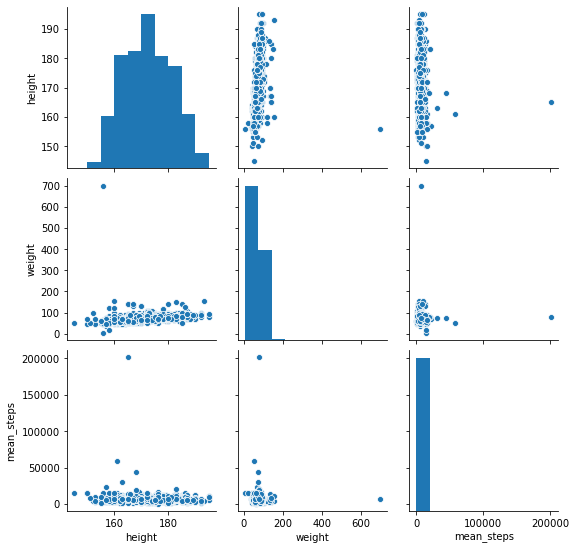

In [132]:
selected_columns = df[['height', 'weight','mean_steps']]#create dataframe for plot

sns.pairplot(selected_columns)#place dataframe in graph
plt.show()#plot figure

Things we can note from this scatterplot:

-  There are no correlations shown between the three variable (maybe because of the outliners).
-  

Before we zoom in on the relations between the three variables we first calculate all the correlations with a correlation matrix.

In [133]:
corr = df[['mean_steps', 'height', 'weight']].corr()#calculate correlation for correlation matrix
corr#print correlation matrix

,mean_steps,height,weight
mean_steps,1.000000,-0.069667,-0.016293
height,-0.069667,1.000000,0.265138
weight,-0.016293,0.265138,1.000000


The correlation matrix shows small negative and positive correlations. Now we first need to leave out the outliners to see if a higher correlation occurs:

We leave out:

-  Weight belowe 35 kg
-  Weight above 160 kg
-  Steps above 17500

In [134]:
df_corr = df.loc[(df.weight <= 160) & (df.weight >= 35) & (df.mean_steps <= 17500)]#create new dataframe for new correlation, leave out weight and steps

corr = df_corr[['mean_steps', 'height', 'weight']].corr()#calculate correlation for correlation matrix
corr#print correlation matrix

,mean_steps,height,weight
mean_steps,1.000000,-0.074482,-0.067763
height,-0.074482,1.000000,0.511359
weight,-0.067763,0.511359,1.000000


The second correlation matrix shows:

-  Small negative correlation between height and steps.
-  Small negative correlation between weight and steps.
-  Medium positive correlation between height and weight.

In the second correlation matrix we see a lower negative and higher positive correlation. Therefore, we leave the same values out in the next plots. 

Now we zoom in on the relations between the height and the steps. We will plot the steps on the xaxis because we want to see if taller people take more steps. Steps is our *independent value* and height is our *dependent value*.

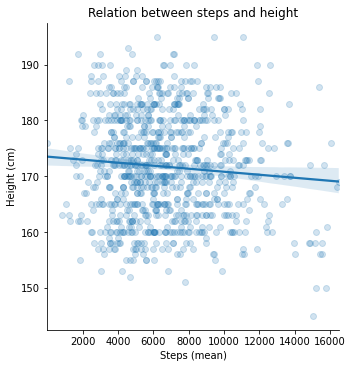

In [144]:
df_height = df.loc[df.mean_steps <= 17500]#create dataframe that includes only mean_steps below 17500

sns.lmplot(x='mean_steps', y='height', fit_reg=True, data=df_height, scatter_kws={'alpha':0.2}) #fit_reg=True creates the regression line
plt.xlabel('Steps (mean)') #name xaxis
plt.ylabel('Height (cm)')#name yaxis
plt.title('Relation between steps and height')#name title
plt.show()#plot figure

In the plot we can't see a clear correlation.

Now we do the same thing for the steps and weight.

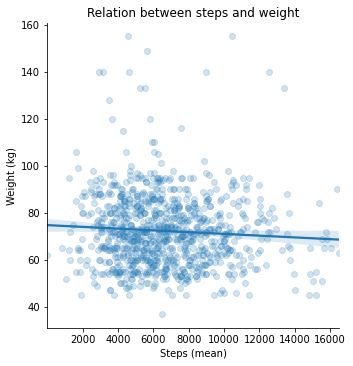

In [145]:
df_weight = df.loc[(df.weight <= 160) & (df.weight >= 35) & (df.mean_steps <= 17500)]
sns.lmplot(x='mean_steps', y='weight', fit_reg=True, data=df_weight, scatter_kws={'alpha':0.2}) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Steps (mean)') #use matplotlib to refine Seaborn plot
plt.ylabel('Weight (kg)')
plt.title('Relation between steps and weight')
plt.show()

In the plot we also can't see a clear correlation.

To get a clear overview of the correlations we calculate the Pearson's *r* for both the height and weight with the steps.

In [137]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy

selected_columns = df_corr[['height', 'weight','mean_steps']]#select columns for pearson

new_df = selected_columns.copy()

pearsoncorr = new_df.corr(method='pearson')
pearsoncorr

,height,weight,mean_steps
height,1.000000,0.511359,-0.074482
weight,0.511359,1.000000,-0.067763
mean_steps,-0.074482,-0.067763,1.000000


Notes about this pearson correlation:

-  It shows a small negative linear correlation between the height and the steps of approximately -0.07
-  It shows a small negative linear correlation between the weight and the steps of approximately -0.015
-  It shows a small positive linear correlation between the weight and the height of approximately 0.26

We can visualize this in a heatmap.

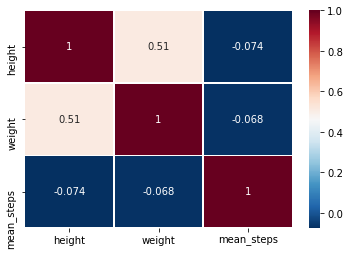

In [138]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Now we look at the relation between the steps and the qualitative variable gender. We put gender on the xaxis this is the *independent value*. 

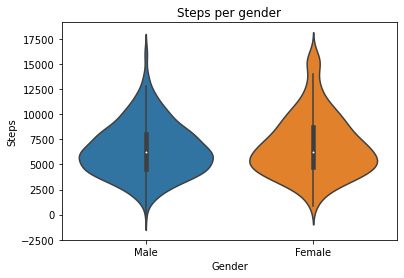

In [139]:
df_steps_max = df.loc[df.mean_steps <= 17500]

sns.violinplot(x='gender', y='mean_steps', data=df_steps_max)#
plt.xlabel('Gender')#set yaxis name
plt.ylabel('Steps')#set xaxis name
plt.title('Steps per gender')#set graph title
plt.show()

At last we look at the relation between two qualitative variables(gender and education). Here we also put gender on the xaxis.

Text(0.5, 1.0, 'Count education types per gender')

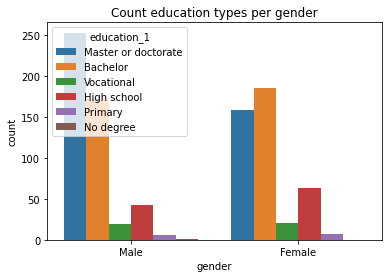

In [147]:
sns.countplot(x='gender', hue='education_1', data=df)#load column gender and education_1 in graph
plt.title('Count education types per gender')#set graph title

This table shows us a small different in education between females and males for bachelor, vocational, highschool, primary and no degree. We only see significant different in the Master or doctorate degree. For this we can argue that the sample group is incomplete. Therefore, we can't tell if there is a relation. 

Before we can tell whether there is an incomplete sample, we first need to count the number of male and female participants:

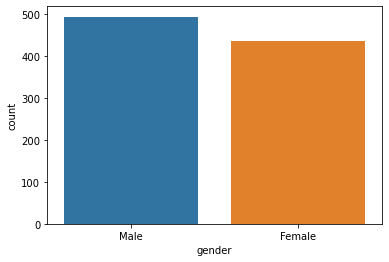

In [149]:
sns.countplot(x='gender', data=df)#load column gender in graph

This count table confirms our statement. 

In [146]:
pd.crosstab(df['gender'], df['education_1'], normalize='index')

education_1,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
gender,,,,,,
Female,0.425287,0.144828,0.365517,0.000000,0.016092,0.048276
Male,0.348178,0.087045,0.512146,0.002024,0.012146,0.038462
